# LA ALL TOGETHER:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['font.size'] = 14
import pgeocode
plt.style.use('ggplot')
sns.set(font_scale=1.5)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
import scipy.stats as stats
from pandas.api.types import CategoricalDtype


from pygeocoder import Geocoder
from pandas.api.types import CategoricalDtype

from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import KFold

from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from googletrans import Translator

from sklearn.preprocessing import StandardScaler

In [2]:
LA_19_q3 = pd.read_csv('/Users/vilvaki/Desktop/GA/bikes/los-angeles-metro-bike-share-trip-data/metro-bike-share-trips-2019-q3.csv')
LA_19_q2 = pd.read_csv('/Users/vilvaki/Desktop/GA/bikes/los-angeles-metro-bike-share-trip-data/metro-bike-share-trips-2019-q2.csv')
LA_19_q1 = pd.read_csv('/Users/vilvaki/Desktop/GA/bikes/los-angeles-metro-bike-share-trip-data/metro-bike-share-trips-2019-q1.csv')
LA_18_q4 = pd.read_csv('/Users/vilvaki/Desktop/GA/bikes/los-angeles-metro-bike-share-trip-data/metro-bike-share-trips-2018-q4.csv')
LA_18_q3 = pd.read_csv('/Users/vilvaki/Desktop/GA/bikes/los-angeles-metro-bike-share-trip-data/metro-bike-share-trips-2018-q3.csv')
LA_18_q2 = pd.read_csv('/Users/vilvaki/Desktop/GA/bikes/los-angeles-metro-bike-share-trip-data/metro-bike-share-trips-2018-q2.csv')
LA_18_q1 = pd.read_csv('/Users/vilvaki/Desktop/GA/bikes/los-angeles-metro-bike-share-trip-data/metro-bike-share-trips-2018-q1.csv')
LA_17_q4 = pd.read_csv('/Users/vilvaki/Desktop/GA/bikes/los-angeles-metro-bike-share-trip-data/metro-bike-share-trips-2017-q4-v2.csv')
LA_17_q3 = pd.read_csv('/Users/vilvaki/Desktop/GA/bikes/los-angeles-metro-bike-share-trip-data/metro-bike-share-trips-2017-q3.csv')
LA_17_q2 = pd.read_csv('/Users/vilvaki/Desktop/GA/bikes/los-angeles-metro-bike-share-trip-data/la_metro_gbfs_trips_Q2_2017.csv')
LA_17_q1 = pd.read_csv('/Users/vilvaki/Desktop/GA/bikes/los-angeles-metro-bike-share-trip-data/la_metro_gbfs_trips_Q1_2017.csv')

/Users/vilvaki/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# LA_19_q3
# LA_19_q2
# LA_19_q1
# LA_18_q4
# LA_18_q3
# LA_18_q2
# LA_18_q1
# LA_17_q4
# LA_17_q3
# LA_17_q2
# LA_17_q1

In [4]:
print(LA_19_q3.shape)
print(LA_19_q2.shape)
print(LA_19_q1.shape)
print(LA_18_q4.shape)
print(LA_18_q3.shape)
print(LA_18_q2.shape)
print(LA_18_q1.shape)
print(LA_17_q4.shape)
print(LA_17_q3.shape)
print(LA_17_q2.shape)
print(LA_17_q1.shape)

(92124, 15)
(64545, 15)
(57358, 15)
(73867, 15)
(95283, 14)
(77357, 14)
(65387, 14)
(71214, 14)
(72337, 14)
(51918, 14)
(33786, 14)


In [5]:
print(LA_19_q3.shape[0]+LA_19_q2.shape[0]+LA_19_q1.shape[0]+LA_18_q4.shape[0]+LA_18_q3.shape[0]\
      +LA_18_q2.shape[0]+LA_18_q1.shape[0]+LA_17_q4.shape[0]+LA_17_q3.shape[0]+LA_17_q2.shape[0]+LA_17_q1.shape[0])

755176


In [6]:
print(LA_19_q3.isnull().sum().sum())
print(LA_19_q2.isnull().sum().sum())
print(LA_19_q1.isnull().sum().sum())
print(LA_18_q4.isnull().sum().sum())
print(LA_18_q3.isnull().sum().sum())
print(LA_18_q2.isnull().sum().sum())
print(LA_18_q1.isnull().sum().sum())
print(LA_17_q4.isnull().sum().sum())
print(LA_17_q3.isnull().sum().sum())
print(LA_17_q2.isnull().sum().sum())
print(LA_17_q1.isnull().sum().sum())

12422
7254
3918
2236
4794
2486
2226
3750
1598
1642
1570


In [7]:
print(LA_19_q3.columns)
print(LA_17_q1.columns)

Index(['trip_id', 'duration', 'start_time', 'end_time', 'start_station',
       'start_lat', 'start_lon', 'end_station', 'end_lat', 'end_lon',
       'bike_id', 'plan_duration', 'trip_route_category', 'passholder_type',
       'bike_type'],
      dtype='object')
Index(['trip_id', 'duration', 'start_time', 'end_time', 'start_station_id',
       'start_lat', 'start_lon', 'end_station_id', 'end_lat', 'end_lon',
       'bike_id', 'plan_duration', 'trip_route_category', 'passholder_type'],
      dtype='object')


In [8]:
# LA_19_q3.head()
# LA_19_q2.head()
# LA_19_q1.head()
# LA_18_q4.head()
# LA_18_q3.head()
# LA_18_q2.head()
# LA_18_q1.head()
# LA_17_q4.head()
# LA_17_q3.head()
# LA_17_q2.head()
# LA_17_q1.head()

In [9]:
frames = [LA_19_q3,LA_19_q2,LA_19_q1,LA_18_q4,LA_18_q3,LA_18_q2,LA_18_q1,LA_17_q4,LA_17_q3,LA_17_q2,LA_17_q1]

LA = pd.concat(frames)

/Users/vilvaki/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
LA.shape 
# 755176 correct!

(755176, 17)

In [11]:
LA.head()

,bike_id,bike_type,duration,end_lat,end_lon,end_station,end_station_id,end_time,passholder_type,plan_duration,start_lat,start_lon,start_station,start_station_id,start_time,trip_id,trip_route_category
0,6168,standard,5,34.063351,-118.296799,4410.0,NaN,7/1/2019 0:09,Monthly Pass,30.0,34.066990,-118.290878,4312.0,NaN,7/1/2019 0:04,124657107,One Way
1,17584,electric,9,34.063389,-118.236160,3066.0,NaN,7/1/2019 0:16,Monthly Pass,30.0,34.063389,-118.236160,3066.0,NaN,7/1/2019 0:07,124657587,Round Trip
2,18920,electric,5,34.066990,-118.290878,4312.0,NaN,7/1/2019 0:25,Monthly Pass,30.0,34.063351,-118.296799,4410.0,NaN,7/1/2019 0:20,124658068,One Way
3,6016,standard,20,34.012520,-118.285896,4275.0,NaN,7/1/2019 1:04,Walk-up,1.0,34.028511,-118.256668,3045.0,NaN,7/1/2019 0:44,124659747,One Way
4,5867,standard,27,34.056969,-118.253593,3049.0,NaN,7/1/2019 1:11,Monthly Pass,30.0,34.048401,-118.260948,3035.0,NaN,7/1/2019 0:44,124660227,One Way


In [12]:
LA.isnull().sum()

bike_id                     0
bike_type              467282
duration                    0
end_lat                 16696
end_lon                 16696
end_station             33786
end_station_id         721390
end_time                    0
passholder_type             0
plan_duration             384
start_lat                5060
start_lon                5060
start_station           33786
start_station_id       721390
start_time                  0
trip_id                     0
trip_route_category         0
dtype: int64

In [13]:
LA.drop(columns=['bike_type','end_lat','end_lon','end_station','end_station_id','plan_duration',\
                'start_lat','start_lon','start_station','start_station_id'], inplace=True)

In [14]:
LA.shape 

(755176, 7)

In [15]:
LA

,bike_id,duration,end_time,passholder_type,start_time,trip_id,trip_route_category
0,6168,5,7/1/2019 0:09,Monthly Pass,7/1/2019 0:04,124657107,One Way
1,17584,9,7/1/2019 0:16,Monthly Pass,7/1/2019 0:07,124657587,Round Trip
2,18920,5,7/1/2019 0:25,Monthly Pass,7/1/2019 0:20,124658068,One Way
3,6016,20,7/1/2019 1:04,Walk-up,7/1/2019 0:44,124659747,One Way
4,5867,27,7/1/2019 1:11,Monthly Pass,7/1/2019 0:44,124660227,One Way
...,...,...,...,...,...,...,...
33781,5978,540,3/31/2017 23:52,Walk-up,3/31/2017 23:43,23660993,One Way
33782,6478,480,3/31/2017 23:52,Walk-up,3/31/2017 23:44,23660992,One Way
33783,6183,480,3/31/2017 23:52,Walk-up,3/31/2017 23:44,23660991,One Way
33784,5900,420,3/31/2017 23:52,Walk-up,3/31/2017 23:45,23660990,One Way


In [16]:
LA.dtypes

bike_id                object
duration                int64
end_time               object
passholder_type        object
start_time             object
trip_id                 int64
trip_route_category    object
dtype: object

In [17]:
LA['start_time'] = pd.to_datetime(LA.start_time)

In [18]:
LA.dtypes

bike_id                        object
duration                        int64
end_time                       object
passholder_type                object
start_time             datetime64[ns]
trip_id                         int64
trip_route_category            object
dtype: object

In [19]:
LA.start_time.max() ,LA.start_time.min()

(Timestamp('2019-09-30 23:58:00'), Timestamp('2017-01-01 00:15:00'))

In [20]:
LA['Day'] = LA.start_time.dt.weekday_name

LA.head()

,bike_id,duration,end_time,passholder_type,start_time,trip_id,trip_route_category,Day
0,6168,5,7/1/2019 0:09,Monthly Pass,2019-07-01 00:04:00,124657107,One Way,Monday
1,17584,9,7/1/2019 0:16,Monthly Pass,2019-07-01 00:07:00,124657587,Round Trip,Monday
2,18920,5,7/1/2019 0:25,Monthly Pass,2019-07-01 00:20:00,124658068,One Way,Monday
3,6016,20,7/1/2019 1:04,Walk-up,2019-07-01 00:44:00,124659747,One Way,Monday
4,5867,27,7/1/2019 1:11,Monthly Pass,2019-07-01 00:44:00,124660227,One Way,Monday


In [21]:
days_of_the_week = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
LA['Day'] = LA['Day'].astype(CategoricalDtype(categories=days_of_the_week, ordered=True))

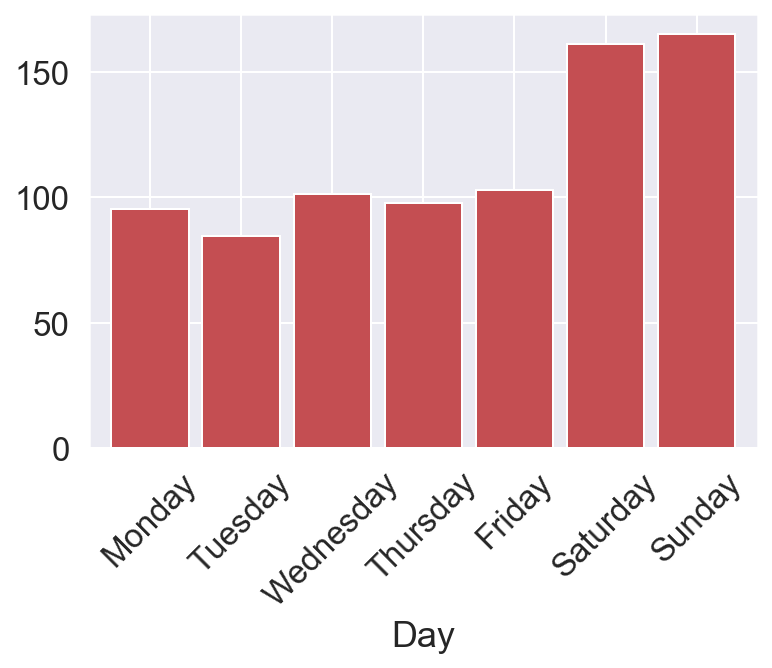

In [22]:
LA.groupby('Day')['duration'].mean().plot(
    kind='bar', color='r', width=0.85)
plt.xticks(rotation=45)
plt.show()

In [23]:
LA['Month'] =  LA.start_time.dt.month_name()

In [24]:
LA['Month'].value_counts()

August       91378
September    87430
July         80936
June         71939
May          64417
March        58007
April        57464
October      56749
January      52039
November     46585
February     46485
December     41747
Name: Month, dtype: int64

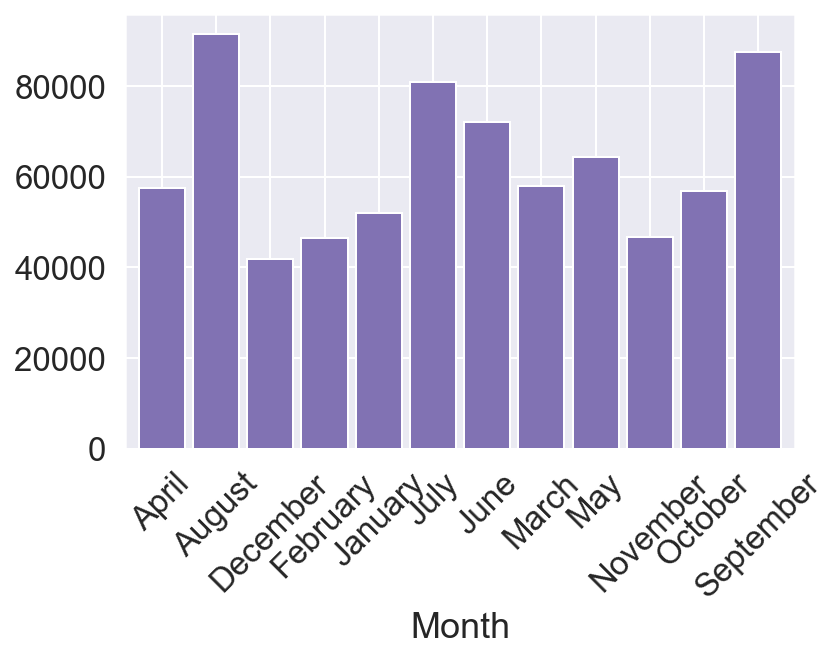

In [25]:
LA.groupby('Month')['duration'].count().plot(
    kind='bar', color='m', width=0.85)
plt.xticks(rotation=45)
plt.show()

Text(0, 0.5, 'Counts')

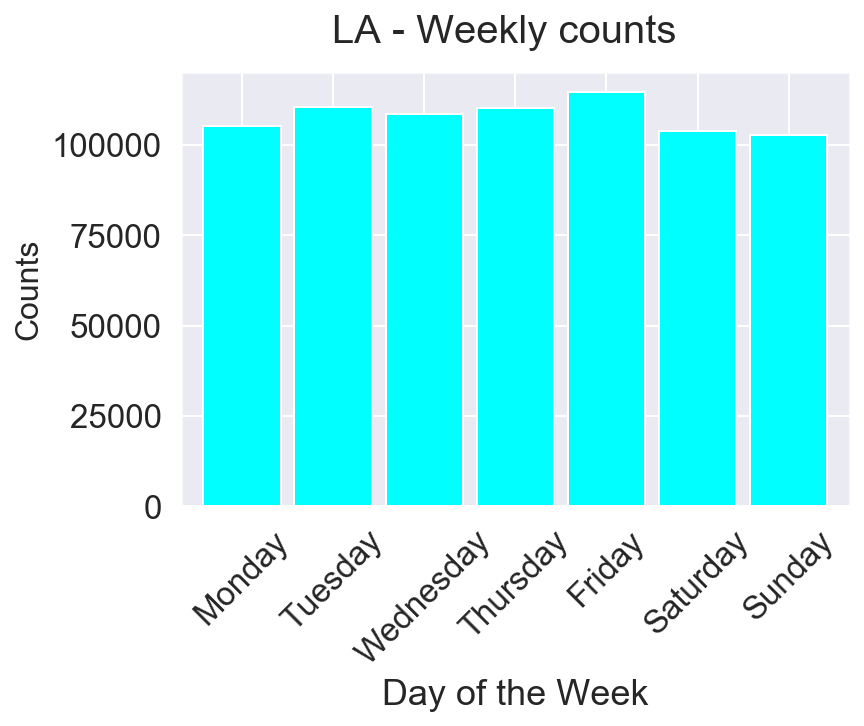

In [29]:
fig = plt.figure()
LA.groupby('Day')['duration'].count().plot(
    kind='bar', color='cyan', width=0.85)
fig.suptitle('LA - Weekly counts', fontsize=20)
plt.xlabel('Day of the Week', fontsize=18)
plt.xticks(rotation=45)
plt.ylabel('Counts', fontsize=16)